2.1 데이터 전처리 기초
- 데이터 본격 분석 이전에 다음과 같은 패키지 사용해 기초적인 전처리를 하는 방법 설명
- missingno 패키지: 결측 데이터 검색
- sklearn.impute 패키지: 결측 데이터 대체
- patsy 패키지: 데이터 선택, 변환, 추가, 스케일링
    - statsmodels 패키지와 같이 깔린다
- sklearn.preprocessing :  스케일링, 변환

### missingno 패키지
- 데이터 수집하다보면 결측 데이터 생김.
- 미싱노 패키지는 판다스 데이터프레임에서 결측 데이터를 찾는 기능 제공
- 데이터 프레임에 결측 데이터가 NaN(Not a number) 값으로 저장돼 있어야 한다
- NaN은 부동소수점 실수형에만 있다. 정수형, 시간형에는 없다. 그런데 판다스는 특별한 타입 가지고 있어
- int64Dtype 자료형은 NaN을 같이 집어넣어줄 수 있다.
- 시간형에도 datetime64[ns] 자료형 쓰게 되면 NaT(not a Time) 쓸 수 있게 됨

- df = pd.read_csv(csv_data, dtype = {"x1": pd.Int64Dtype()}, parse_dates = [3]) # 3번째 행렬 시간 데이터로 불러오기
- 판다스 데이터프레임 자체도 isnull() 또는 isna() 메서드로 사용하면 결측 데이터의 위치 알아내는 것이 가능

- df.isnull() 빠진 부분 있으면 False, 정상은 True로 해서 셀 수 있음
- df.isnull().sum()

- msno.matrix(titanic)
    - 미싱노 데이터프레임 형태로 빠진 부분 보여준다
- msno.bar(titanic) 하면 바 플롯 형태로 보여준다

- 결측 데이터를 처리하는 방법은 두 가지다. 버리거나 채우거나
    - 결측 데이터가 너무 많은 경우 해당 데이터 열 전체를 삭제할 수 있다.
        - dropna() 메서드를 사용하면 결측 데이터가 존재하는 행이나 열을 지울 수 있다
        - 결측 데이터가 하나라도 있으면 다 지움
    - 결측 데이터가 일부인 경우 가장 그럴듯한 값으로 대체할 수 있다. 이를 결측데이터 대체(imputation)이라고 한다.
        - 채운다고 하는 것은 가짜로 채우는 것. 데이터 퀄리티 낮추는 역할을 함.

#### 버릴 때: dropna()
- 열로 지울 때
    - df.dropna(axis=1)
- thresh 인수를 사용하면 특정 갯수 이상의 비결측 데이터가 있는 행 또는 열만 남긴다
    - df.dropna(thresh=7, axis=1)
- 데이터 절반 이상 없는 열 다 지워라
    - titanic = titanic.dropna(thresh=int(len(titanic) * 0.5)), axis=1)
    - msno.matrix(titanic)
    - plt.show()

#### 채우고 싶을 떄: sklearn 패키지의 SimpleImputer 클래스 사용
- 대푯값을 하나 찾아서 대푯값으로 채우는 일반적 방법
- 1. Simple Imputer 클래스 객체를 생성.
    - 이때 strategy 인수를 'mean'으로 하면 평균값, 'median'으로 하면 중앙값, 'most_frequent'로 하면 최빈값으로 대체값으로 사용
    - 2. fit_transform 메서드를 사용해 대체값이 채워진 데이터프레임을 생성
- strategy 인수를 선택하는 방법
    - 1. 데이터가 실수 연속값인 경우에는 평균 또는 중앙값을 사용할 수 있다. 값의 분포가 대칭적이면 평균이 좋고 값의 분포가 심하게 비대칭인 경우에는 중앙값이 적당
    - 2. 대아터가 범주값이거나 정수값인 경우에는 최빈값을 사용할 수 있다.

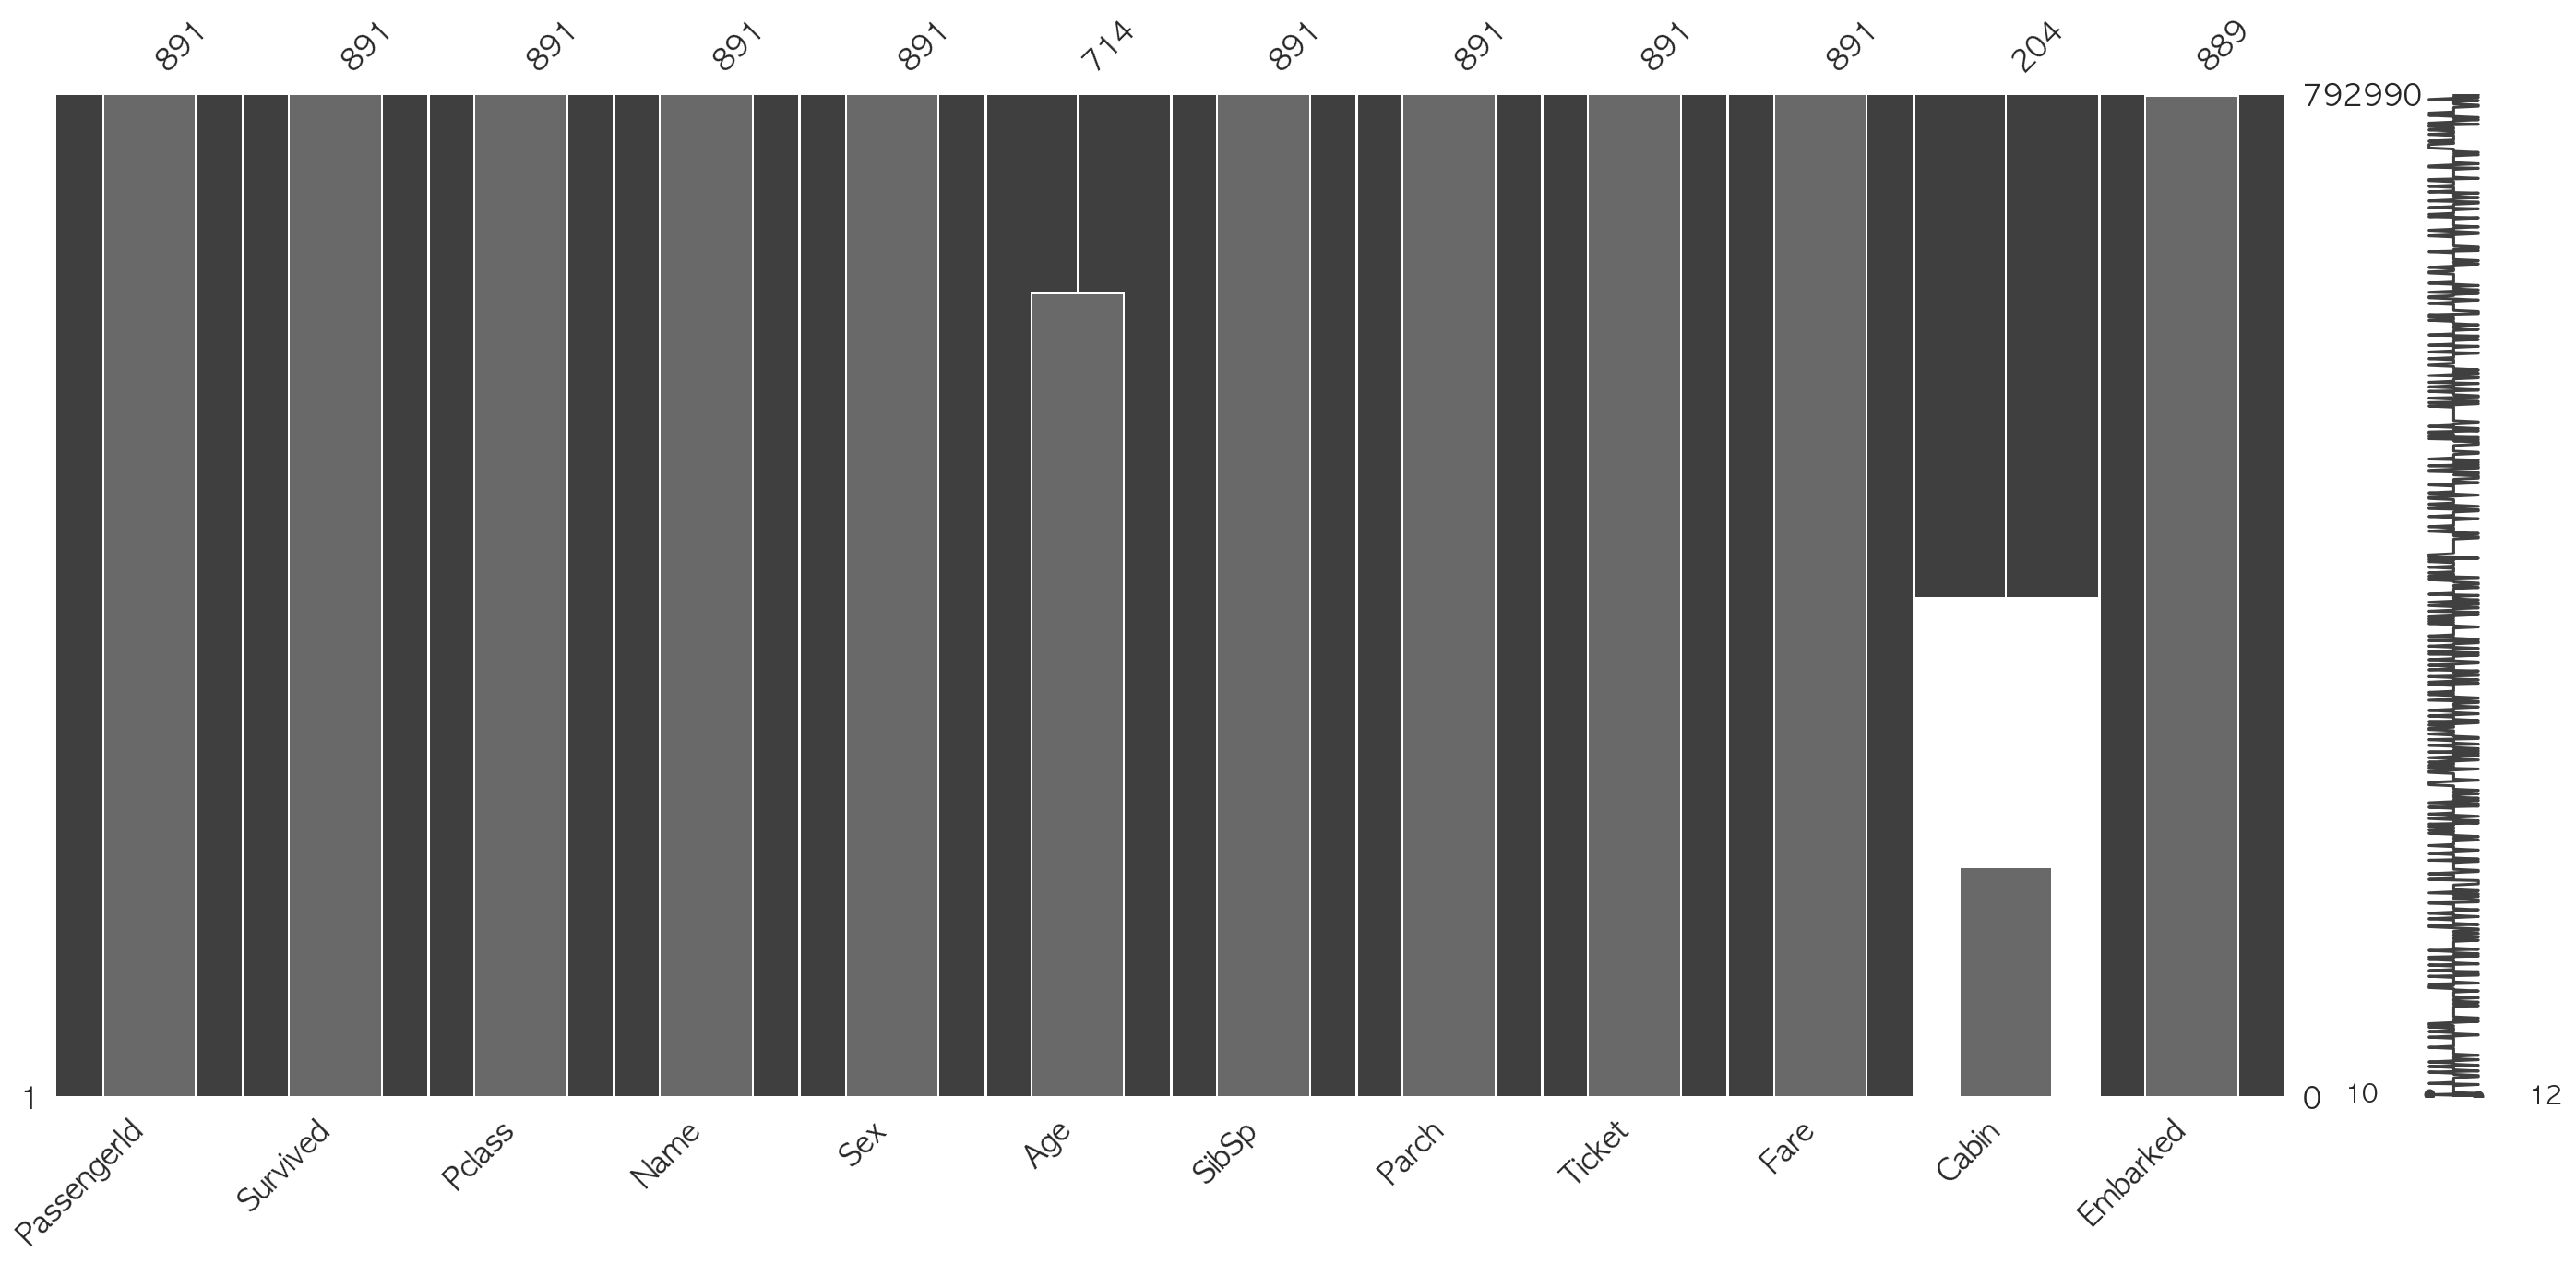

In [20]:
from sklearn.impute import SimpleImputer
import missingno as msno

df = pd.read_csv("../python_class/train.csv")
msno.matrix(df)
msno.bar(df)

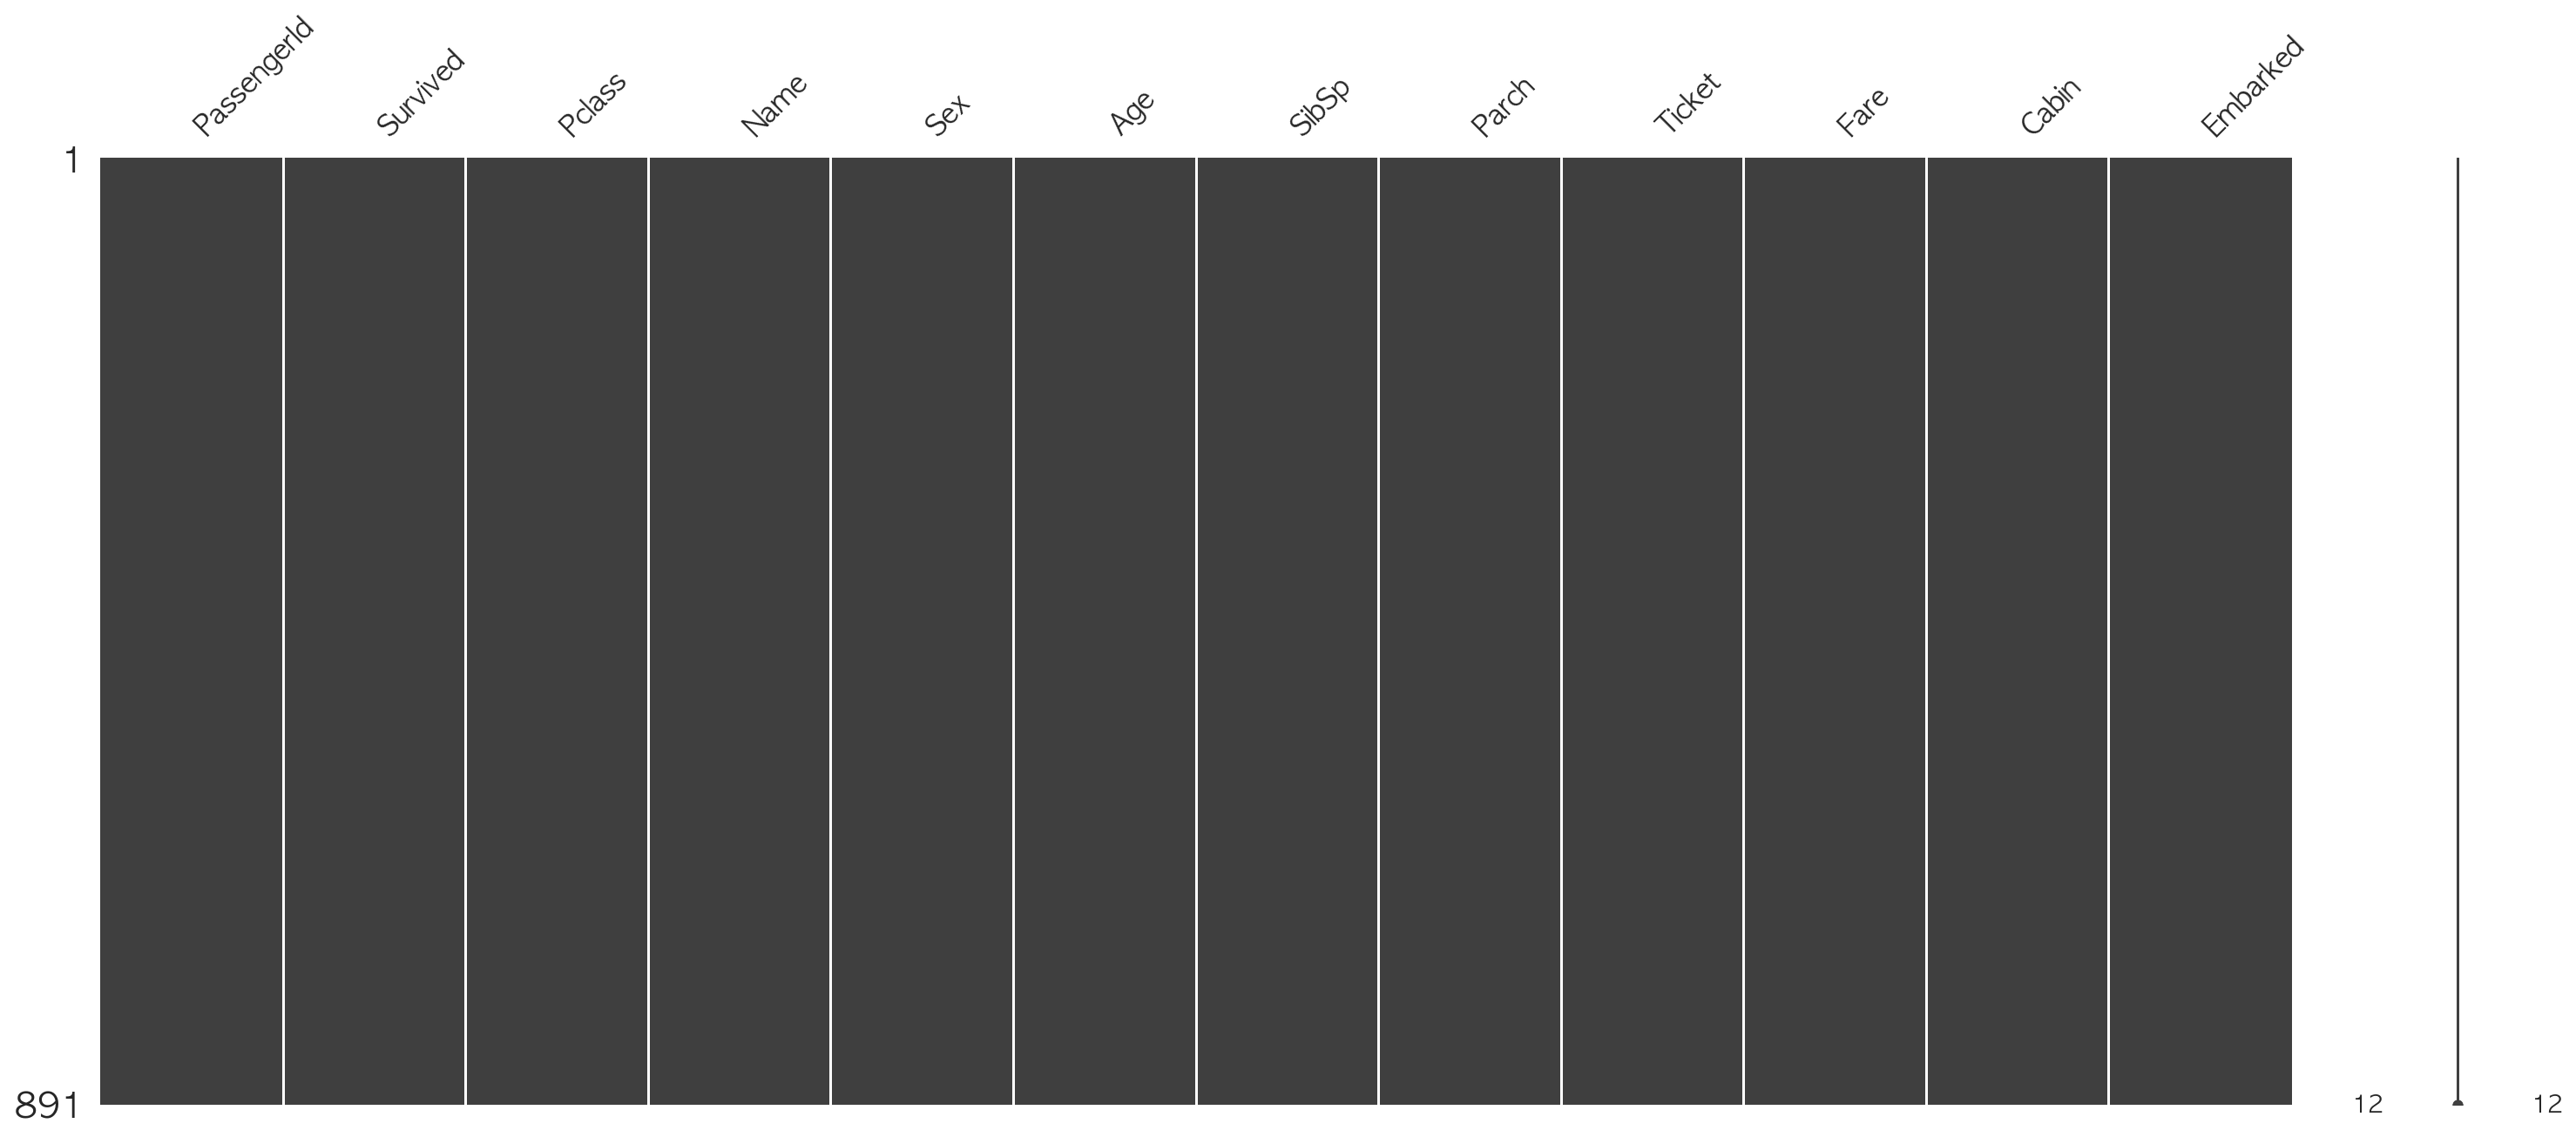

In [25]:
imputer = SimpleImputer(strategy = "most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
msno.matrix(df)

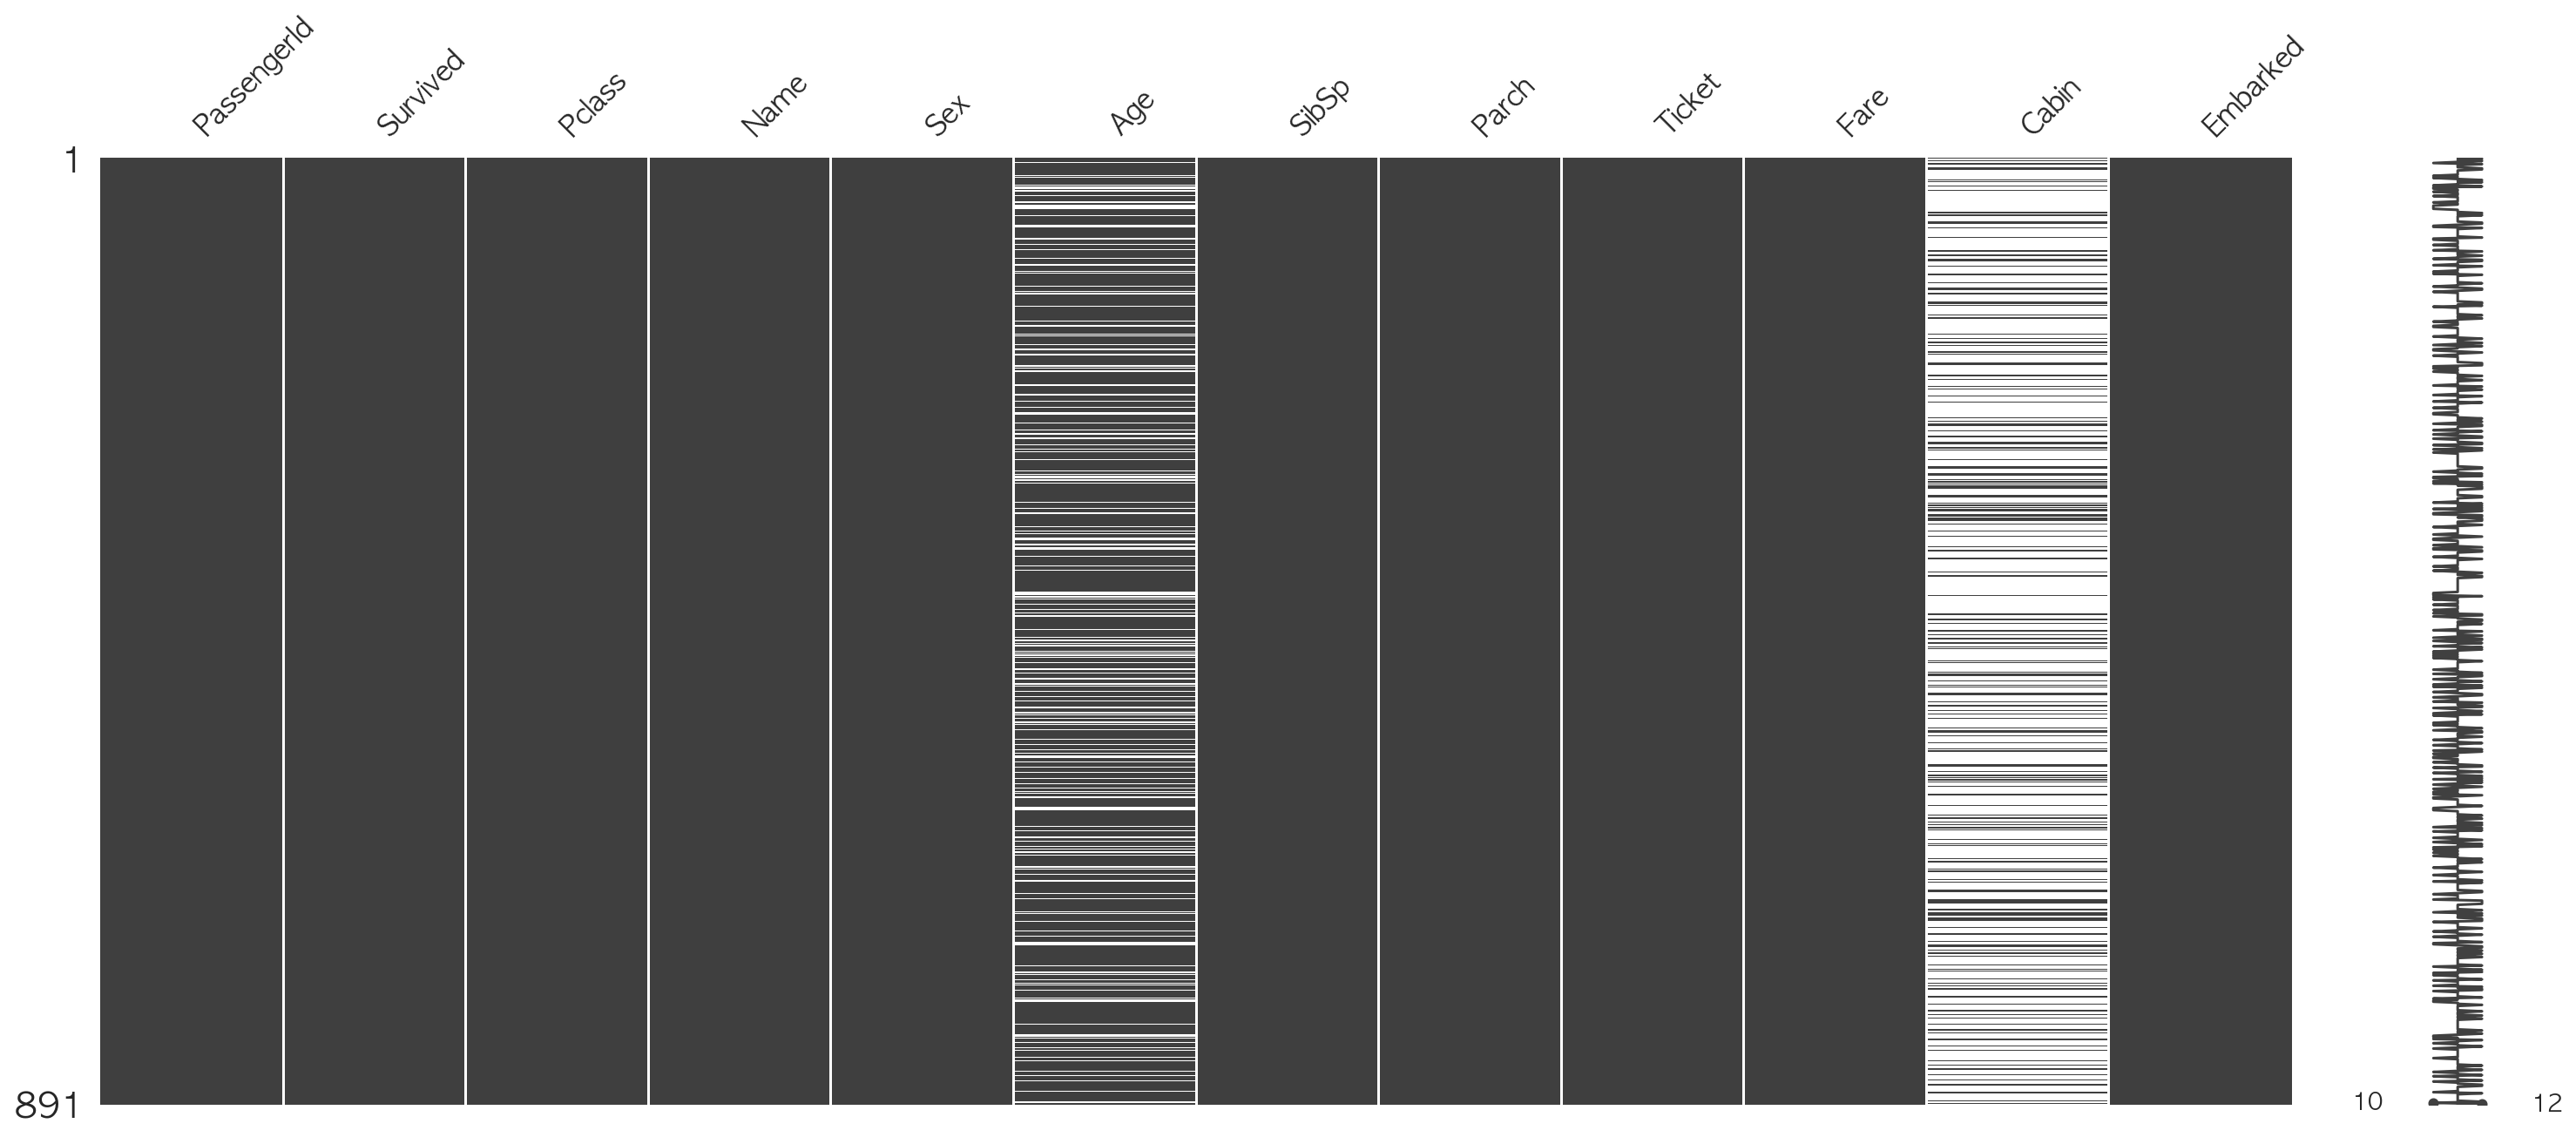

In [52]:
# 카테고리 데이터의 경우 최빈값을 쓰게 됨.
titanic = pd.read_csv("../python_class/train.csv")
imputer_embark_town = SimpleImputer(strategy = "most_frequent")
titanic["Embarked"] = pd.DataFrame(imputer_embark_town.fit_transform(titanic[["Embarked"]]))
msno.matrix(titanic)

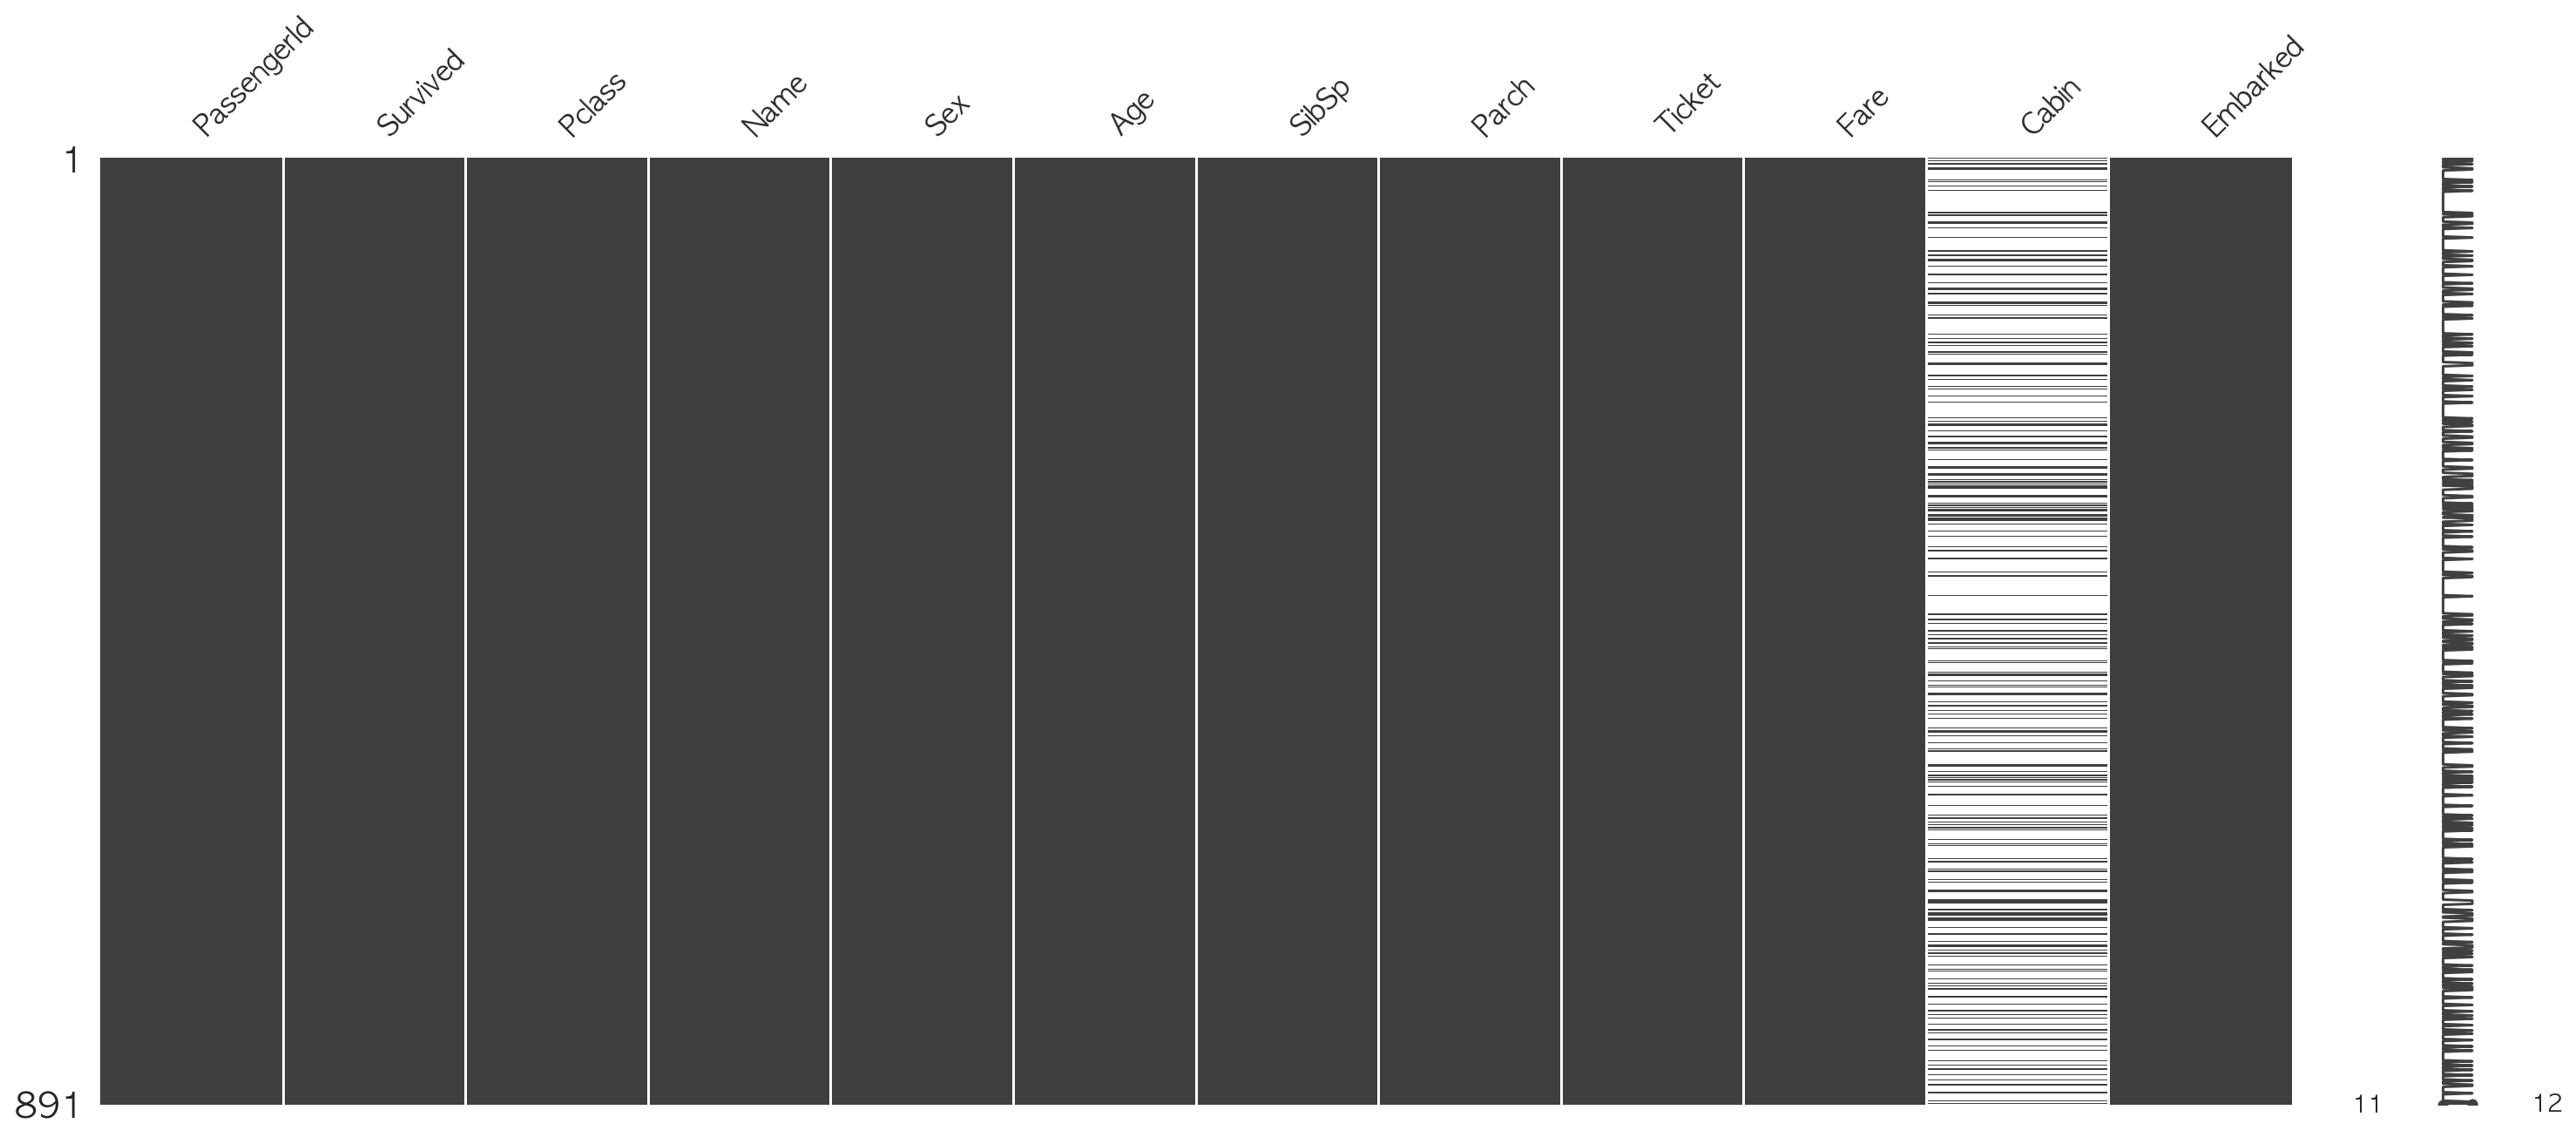

In [57]:
# Age 데이터는 실수 값, 실수 값에서는 절대로 최빈값 쓰면 안 된다. 같은 값이 두 번 이상 반복되는 경우가 거의 없기 때문
# 평균값 아니면 중앙값 써줘야
# 대칭이면 아무 상관없는데 비대칭이 심하면 중앙값이 좋다
# 비대칭으로 나타나는 데이터 특징 중 하나는 항상 양수인 데이터들. x=0이라는 벽에 막혀 있기 때문에 찌그러져 비대칭으로 보이는 경우가 많음
# 양수밖에 나올 수 없는 데이터 수량 가격 등은 비대칭인 경우가 많다
imputer_age = SimpleImputer(strategy = "median")
titanic["Age"] = imputer_age.fit_transform(titanic[["Age"]])
msno.matrix(titanic)
# 미싱노 오른쪽 부분은 spark line, 행 단위로 봤을 때 데이터 얼마나 누락돼 있는지 보여줌

### patsy 패키지
- 제일 중요한 패키지 중 하나. 전처리에서 할 수 있는 것들 대부분 들어가 있음
- 데이터 프레임 하나에 다 넣고 시작하는 게 편하다
- 전체 다 들어있는 데이터 프레임에서 일부만 뺴내서 사용하도록 지원
- dmatrix() 함수에 모형 정의 문자열 formula와 원 데이터를 담은 데이터 프레임 data를 입력하면 formula에서 지정한 대로 변환 데이터 출력
    - data_transformed = dmatrix(formula, data)

In [58]:
from patsy import dmatrix

In [70]:
df = pd.read_csv("../python_class/train.csv")
dmatrix("Survived + 0", data=df) # + 0은 1로 구성된 상수항을 넣지 말라는 뜻
# 만약 이 부분이 없으면 patsy는 자동으로 가장 앞에 Intercept란 이름의 상수항 데이터를 추가
# 인터셉트 없으면 회귀 분석 안 됨.
# - 1라고 써도 됨

DesignMatrix with shape (891, 1)
  Survived
         0
         1
         1
         1
         0
         0
         0
         0
         1
         1
         1
         1
         0
         0
         0
         1
         0
         1
         0
         1
         0
         1
         1
         1
         0
         1
         0
         0
         1
         0
  [861 rows omitted]
  Terms:
    'Survived' (column 0)
  (to view full data, use np.asarray(this_obj))

In [78]:
#titanic = sns.load_dataset("../python_class/train.csv")
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [84]:
dmatrix("PassengerId + Survived + Pclass", data=titanic)

DesignMatrix with shape (891, 4)
  Intercept  PassengerId  Survived  Pclass
          1            1         0       3
          1            2         1       1
          1            3         1       3
          1            4         1       1
          1            5         0       3
          1            6         0       3
          1            7         0       1
          1            8         0       3
          1            9         1       3
          1           10         1       2
          1           11         1       3
          1           12         1       1
          1           13         0       3
          1           14         0       3
          1           15         0       3
          1           16         1       2
          1           17         0       3
          1           18         1       2
          1           19         0       3
          1           20         1       3
          1           21         0       2
          1          

- dmatrix() 함수는 변수를 어떤 함수에 넣어서 다른 값으로 만드는 수학 변환도 가능
- dmatrix("x1 + np.log(np.abs(x2))", df)
- 기존의 데이터를 조합 연선해 새로운 데이터를 만드는 것도 가능.
    - 특히 두 변수를 곱해서 만들어지는 새로운 변수를 상호작용(interaction)이라고 한다.
    - 상호작용은 :(콜론) 기호를 사용해 만들어진다
    - dmatrix("x1 + x2 + x1:x2 + 0", df)
        - dmatrix("x1 * x2 + 0", df) 와 같다
- 그런데 + 기호를 그냥 같이 출력해달라는 정도가 아니라 실제로 더한 값을 새로운 열로 만들고 싶을 떄
    - dmatrix("x1 + x2 + I(x1 + x2) + 0", df) # I 쓰고 괄호로

- 선형회귀분석을 할 떄는 조건 수(condition number)의 영향 떄문에 데이터의 평균을 0으로 표준편차를 1로 만드는 스케일링(scaling) 작업을 하는 것이 분석 결과의 품질을 높일 수 있다.
    - 얘는 킬로미터 얘는 밀리미터 단위라서 단위가 달라서 크기가 제각각이라서 조건수가 나빠질 수 있다. 이를 잡아주기 위해 스케일링 해줘야
    - center(): 평균을 0으로 스케일링
    - standardize(): 평균을 0으로 하고 표준편차를 1로 스케일링
    - scale(): standardize()와 같음
        - dm = dmatrix("center(x1) + 0", df)
    - 스케일링을 하면 계산에 썼던 평균값 표준편차값은 design_info 안에 저장
        - dm.design_info.factor_infos
        - train data를 스케일해서 만든 모델에 test 데이터를 그냥 집어 넣어서 스케일을 새롭게 하면 기대했던 값과 다른 값이 나오므로 기존에 있던 train data의 평균 표준편차 등을 저장해서 다시 사용하기 위해 저장해 놓는 것

### sklearn preprocessing
- sklearn preproecessing 서브패키지도 스케일링 및 변수변환을 위한 StandardScaler 클래스라는 기능을 제공
- 사용 방법:
    - 1. 학습용 데이터를 입력으로 fit() 메서드를 실행하면 평균값과 표준편차를 계산하여 객채내에 저장.
    - 2. 다시 학습용 데이터를 입력으로 transform() 메서드를 실행하면 저장했던 평균값을 빼서 새로운 평균값이 0이 되도록 만들고, 저장한 표준편차로 나누어 새로운 표준편차가 1이 되도록 데이터를 변환해 출력. 1단계와 2단계를 합쳐서 fit_transfor() 메서드를 실행할 수도 있다
        - 학습한 것은 그대로 놔두고 변형한 것만 사용하기 위해 단계를 나눠주는 것
    - 3. 검증용 데이터를 입력으로 해 transform() 메서드를 실행해도 학습용 데이터의 평균값과 표준편차를 사용해 검증용 데이터를 변환한다 

- 만약 데이터 결합에 다른 데이터와 동떨어진 아웃라이어가 존재하는 경우
- 스케일링을 했을 때 데이터가 0이 아닌 다른 곳으로 모일 수 있다.
- 이 때는 RobustScaler 클래스를 사용. 클래스는 중앙값이 0, IQR(Interquartile range)이 1이 되도록 변환하기 때문에 아웃라이어가 섞여 있어도 대부분의 데이터는 0 주위에 남아있게 된다

- preprocessing 서브패키지는 데이터 변환을 위한 FunctionTransformer 클래스와 PolynomialFeatures 클래스도 제공한다
- PolynomialFeatures 클래스는 입력 데이터 x를 여러개의 다항식으로 변환한다
    - 다음과 같은 입력 인수를 가진다
    - degree : 차수
    - include_bias: 상수항 생성 여부
- FunctionTransformer 클래스는 사용자가 지정한 함수를 사용해 입력값 x를 변환한다
    - 회귀분석 할 떄는 0, 360도가 같은 값이 나와야 하는데 같지 않게 나온다. 그래서 위 함수 써주는 것

# 2.2 범주형 데이터 처리
- 범주형 데이터는 A, B, C와 같이 종류를 표시하는 데이터를 말한다. 카테고리 데이터라고도 부른다
    - 성별 : 남자, 여자
    - 혈액형: A, B, O, AB
    - 이름 : 홍길동, 성춘향
    - 주소 : 서울, 부산, 대전
    - 1반 2반
        - 숫자로 표현돼 있지만 1이라는 글자를 이용한 것 뿐. 숫자로는 믜미 없음

## 범주형 데이터의 변형
- 대부분의 데이터 분석 모형은 숫자만 입력으로 받을 수 있기 때문에 범주형 데이터는 숫자로 변환해야 한다.
- 범주형 데이터를 숫자로 변환하는 방법은 두 가지다
    - 더미변수화
    - 카테고리 임베딩

### 1) 더미변수화
- 카테고리 값을 복수의 더미 변수로 만드는 것
- 0 또는 1만 가지는 값으로 어떤 특징이 존재하는가 존재하지 않는가를 표시한다
    - 이진지시자
    - 이진변수
    - 지시변수
    - 설계변수
    - 처치
- patsy 패키지를 사용한 더미변수화
    - patsy 패키지의 dmatrix() 함수는 데이터프레임의 문자열 범주값을 더미변수로 바꿔준다
    - df1 = pd.DataFrame(["Male", "Female"], columns=["x"])

In [94]:
df1 = pd.DataFrame(["Male", "Female"], columns=["x"])
df1

,x
0,Male
1,Female


In [99]:
from patsy import dmatrix
dmatrix("x + 0", df1)

DesignMatrix with shape (2, 2)
  x[Female]  x[Male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [100]:
# 순서가 지정 없이 집어넣으면 알파벳 순서로 됨

In [104]:
# 데이터가 범주형 값이지만 정수로 표시된 경우에는 C() 연산자를 이용해 범주형 값임을 명시적으로 지정할 수 있다
df3 = pd.DataFrame([1, 2, 3, 4], columns = ["x"])
dmatrix("C(x) + 0", df3)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)

In [116]:
# C() 연산자를 사용하면 순서도 우리가 원하는 순서로 바꿀 수 있다.
from patsy import dmatrix
df2 = pd.DataFrame(["A", "B", "AB", "O"], columns = ["x"])
dmatrix("x + 0", df2)

DesignMatrix with shape (4, 4)
  x[A]  x[AB]  x[B]  x[O]
     1      0     0     0
     0      0     1     0
     0      1     0     0
     0      0     0     1
  Terms:
    'x' (columns 0:4)

In [130]:
dm = dmatrix("C(x, levels = ['A', 'B', 'AB', 'O']) + 0", df2)
np.asarray(dm)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

- 축소랭크 방식
    - 지금까지 설명한 더미변수 방식( + 0을 한 것)을 풀랭크 방식.
    - 축소랭크(reduced-rank) 방식에서는 특정한 하나의 범주값을 기준값으로 하고, 기준값에 대응하는 더미변수의 가중치는 항상 1로 놓는다
    - dmatrix() 함수를 사용할 때 formula 문자열에 +0을 생략하면 축소랭크 방식으로 더미 변수를 만든다
    - 기준이 되는 더미변수의 이름이 Intercept가 된다. 기준이 되는 더미 변수는 알파벳 순서로 가장 앞의 것이 된다

In [133]:
dmatrix("x", df1)

DesignMatrix with shape (2, 2)
  Intercept  x[T.Male]
          1          1
          1          0
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

### 두 개의 범주형 변수가 있는 경우
- 통합 축소형 방식(d1 더미 하나를 기준값으로 잡고 나머지를 표시하는 방법)
    - 통합축소형 방식은 각각의 변수를 축소형으로 기준값을 더미변수화한다. 다만 기준값을 나타내는 더미변수는 변수의 갯수와 상관없이 하나로 통합한다
- 상호작용 방식
    - 상호작용 방식은 두 범주형 변수를 곱해서 각각의 변수의 조합을 나타내는 새로운 범주형 변수를 만드는 방식.
    - A, B, X, Y를 조합해 새로운 AX, AY, BX, BY의 변수가 생긴 것으로 생각하는 것

### 카테고리 임베딩
- 카테고리 범주값 대신 범주값의 특성을 나타내는 연속값 혹은 연속값 벡터를 사용하는 방법
    - 예를 들면 운동선수 이름 대신 해당 운동선수의 나이 연봉 신체능력치 등을 대신 사용하는 것
    - 카테고리 값 하나에 대해 임베딩해서 들어가게 되는 실수 값이 꼭 하나일 필요 없다.
    - 분석에 필요한 것, 다 넣어도 돼.

### 프로젝트 할 때 카테고리 값 들어가면 기본적으로 더미변수화 되니까 너무 많은 것을 넣으면 문제가 될 수 있다
- 필요하면 임베딩 시켜서 카테고리 값 대신에 실수값을 집어넣을 수 있다

# 4.1 회귀분석 예제
- 실제 데이터를 다루기 전에 가상데이터를 먼저 다룰 것. 가상데이터는 정답이 있는 데이터

In [142]:
# sklearn 패키지에서 가상의 회귀분석 문제를 만들어주는 make_regression() 명령
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, random_state=0, coef=True)
X, y, w

(array([[-0.85409574],
        [ 1.49407907],
        [-0.34791215],
        [ 0.44386323],
        [-0.18718385],
        [ 1.86755799],
        [ 0.4105985 ],
        [-1.70627019],
        [-1.42001794],
        [ 0.8644362 ],
        [ 0.97873798],
        [-0.20515826],
        [ 0.15494743],
        [-0.50965218],
        [ 1.53277921],
        [-0.74216502],
        [-1.45436567],
        [-0.10321885],
        [-2.55298982],
        [ 1.76405235],
        [-1.25279536],
        [-0.97727788],
        [ 0.04575852],
        [-0.4380743 ],
        [ 0.76103773],
        [ 0.14404357],
        [-0.21274028],
        [ 1.20237985],
        [-0.38732682],
        [ 2.2408932 ],
        [ 0.77749036],
        [ 0.15634897],
        [-1.61389785],
        [ 1.9507754 ],
        [ 0.40015721],
        [ 1.46935877],
        [ 1.45427351],
        [-0.30230275],
        [ 0.3130677 ],
        [ 0.33367433],
        [ 2.26975462],
        [-0.15135721],
        [ 0.12167502],
        [ 0

In [164]:
def make_regression2(n_samples, bias, noise, random_state):
    X, y, w = make_regression(n_samples=n_samples, n_features=1, bias=bias, noise=noise, random_state=random_state, coef=True)
    return X, y, w

In [165]:
make_regression2(1000, 2000, 30, 1)

(array([[-1.06787658e+00],
        [-2.91594596e-01],
        [ 5.08077548e-02],
        [ 6.21803504e-01],
        [-5.45774168e-01],
        [ 1.55501599e+00],
        [-2.09752935e-01],
        [ 1.78975468e+00],
        [-7.67803746e-01],
        [ 1.47073986e+00],
        [-2.86384915e-01],
        [-3.64538050e-01],
        [ 4.03491642e-01],
        [ 3.37220938e-01],
        [ 8.64644065e-02],
        [-1.67419581e+00],
        [-9.24323185e-02],
        [ 5.20576337e-01],
        [ 1.46089238e+00],
        [-9.15424368e-01],
        [-1.61198320e-01],
        [ 1.57546791e+00],
        [ 7.44884536e-01],
        [ 1.04499441e+00],
        [-2.79099641e+00],
        [-7.47158294e-01],
        [-1.11711069e+00],
        [-1.09033833e+00],
        [ 8.59870972e-01],
        [ 1.90915485e-01],
        [-3.31283170e-01],
        [-4.23478297e-01],
        [ 3.19656942e-01],
        [-1.94504696e+00],
        [-8.80577600e-01],
        [ 8.38634747e-01],
        [-1.56450785e+00],
 

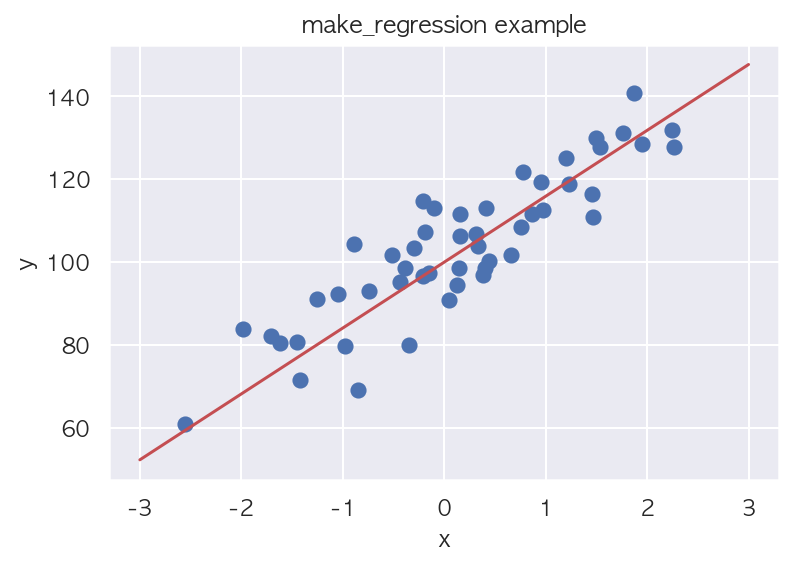

In [166]:
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression example")
plt.show()

In [198]:
def make_regression2(n_samples, bias, noise, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    X = np.random.normal(size=n_samples) # 정규분포에서 무작위 다섯개 샘플
    w = np.random.normal(size=1)[0] * 50
    y0  = X * w + bias
    e = np.random.normal(scale=noise, size=n_samples) # 엡실론은 정규분포여야 한다, 나머지는 상관 없음
    y = y0 + e
    return X, y, w
X, y, w = make_regression2(1000, 1000, 10, 0)

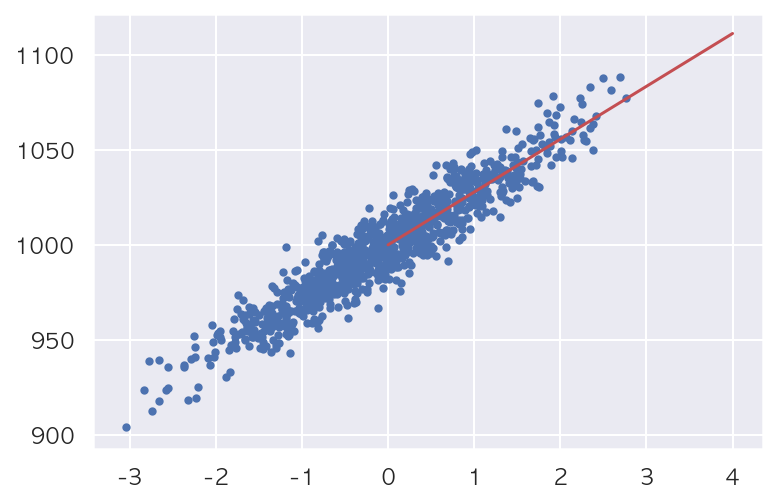

In [203]:
xx = np.linspace(0, 4, 100)
y0 = w * xx + 1000
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=10)

In [219]:
np.random.rand(3,3) # 행렬 생성
x = np.ndarray([3, 10])

array([[0.28702022, 0.17950017, 0.99996402],
       [0.30919183, 0.12474019, 0.46175763],
       [0.43434511, 0.92680248, 0.13420495]])

- 독립변수 x1과 x2가 서로 상관관계가 있을 떄, 다중 공산성이라고 부른다. 회귀분석에 안 좋은 영향을 미친다

# 4.2 선형회귀분석의 기초
- 회귀분석은 독립변수 x에 대응하는 종속변수 y와 가장 비슷한 값 yhat을 출력하는 함수 f(x)를 찾는 과정
- 선형함수에만 국한. linear regression model
- 상수항 결합(상수항 추가 기법) bias augmentation
    - 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것
    - statsmodles 패키지는 상수항 결합을 위한 add_constant 함수를 제공한다

In [250]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [253]:
import statsmodels.api as sm
X = sm.add_constant(X0) # 회귀분석 모형 수식을 간단하게 해주기 위한 상수항결합
X # 마치 한 종류의 데이터 추가로 구해온 것처럼 1이라고 하는 가짜 데이터가 들어가게 됨

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

### 최소자승법(OLS: Ordinary Least Squares)
- 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법
- 잔차의 크기(잔차제곱합)을 가장 작게 하는 가중치 벡터를 구하기 위해 이 식을 가중치 벡터로 미분해 잔차 제곱합의 그레디언트 벡터를 구한다
- 잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터여야 함
- 직교방정식: 그레디언트가 0벡터가 되는 관계를 나타내는 식

- 우리는 넘파이를 써서 회귀분석을 하진 않을 것
- 주로 sklearn과 statsmodels를 씀. 그 중에서도 statsmodels

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model = model.fit(X, y)
print(model.intercept_, model.coef_)

In [ ]:
model = OLS.from_formula(formula, data=df) # 데이터 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다
# 또는 독립변수만 있는 데이터프레임 dfX와 종속변수만 있는 데이터프레임 dfy를 인수로 넣어서 만들 수도 있다. 이때는 독립변수만 있는 데이터프레임이 상수항을 가지고 있어야 한다
model = OLS(dfy, dfX)
result = model.fit()
# 싸이킷런에서는 모델 피팅을 하면 결과로 나오는 것도 모델, 스탯츠모델에서는 RegressionResults 라고 하는 다른 클래스 객체로 출력

In [ ]:
print(result.summary()) # 분석결과 출력
y_new = result.predict(x_new)
# 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해줘야 한다

In [276]:
# 예제
# from sklearn.datasets import make_regression
# import statsmodels.api as sm
X0, y, w = make_regression(n_samples=200, n_features=1, bias=100, noise=1, random_state=0, coef=True)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)
df = pd.DataFrame({"x": X[:, 0], "y": y[:, 0]})
model = sm.OLS.from_formula("y ~ x", data = df) # 포뮬라에 종속변수 ~ 독립변수 식으로 쓸 것
result = model.fit()

#이렇게 해줄수도 있다. 나중에 가면 from_formula 방식에 익숙해지는 게 훨씬 편할 것
# dfy = df[["y"]]
# dfX = sm.add_constant(df[["x"]]) # 대신 상수항 결합은 직접해줘야 함
# model = sm.OLS(dfy, dfX) # 인수 순서 y가 먼저 X가 다음
# result = model.fit()

print(result.summary()) # 그냥 result.summary()하면 데이터프레임 형태로 나오고 프린트로 하면 텍스트 형태로 나옴
# regression Result 클래스에 params는 가중치 벡터, resid는 잔차 벡터

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 15 May 2020   Prob (F-statistic):                nan
Time:                        21:11:19   Log-Likelihood:                -1201.4
No. Observations:                 200   AIC:                             2405.
Df Residuals:                     199   BIC:                             2408.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.3417      3.484     15.312      0.0

In [278]:
# 예측할 때는 X 값의 이름까지 줘야 한다. 딕셔너리나 데이터프레임 형태로 줘야 함
result.predict({"x": [-2, -1, 0, 1, 2]})

0   -5.334173e+01
1   -2.131628e-14
2    5.334173e+01
3    1.066835e+02
4    1.600252e+02
dtype: float64

In [280]:
result.resid.sum() # 잔차 벡터의 합은 0

2.2737367544323206e-12

In [281]:
result.predict({"x": X0.mean()}) # x의 평균값을 넣으면 y의 평균값과 같은 값이 나온다는 것도 확인할 수 있다

0    57.124216
dtype: float64

In [282]:
y.mean()

106.68345499435968

In [ ]:
# 연습문제: 당뇨병 데이터를 스탯츠모델즈로 예측해봐라